In [ ]:
h=float(input("h(ft): "))
rw=float(input("rw(ft): "))
Qo=float(input("Qo(STB/D): "))
Bo=float(input("Bo(bbl/STB): "))
uo=float(input("uo(cp): "))
ct=float(input("ct(1/psi): "))
phi=float(input("phi: "))
pi=float(input("pi(psi): "))
m=float(input("m(psi/cycle): "))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tp=float(input("tp(hrs): "))

tp(hrs): 310


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/horner.xlsx")

In [ ]:
df.head()

,Δt(hrs),Pws
0,0.10,3057
1,0.21,3153
2,0.31,3234
3,0.52,3249
4,0.63,3256


In [ ]:
df["(tp+Δt)/Δt"]=(df["Δt(hrs)"]+tp)/df["Δt(hrs)"]

In [ ]:
df.head()

,Δt(hrs),Pws,(tp+Δt)/Δt
0,0.10,3057,3101.000000
1,0.21,3153,1477.190476
2,0.31,3234,1001.000000
3,0.52,3249,597.153846
4,0.63,3256,493.063492


In [ ]:
df.drop(["Δt(hrs)"],axis=1)
df=df[["(tp+Δt)/Δt","Pws"]]
df.head(10)

KeyError: ignored

In [ ]:
import plotly.express as px
px.scatter(x=df["(tp+Δt)/Δt"],y=df['Pws'],log_x=True)

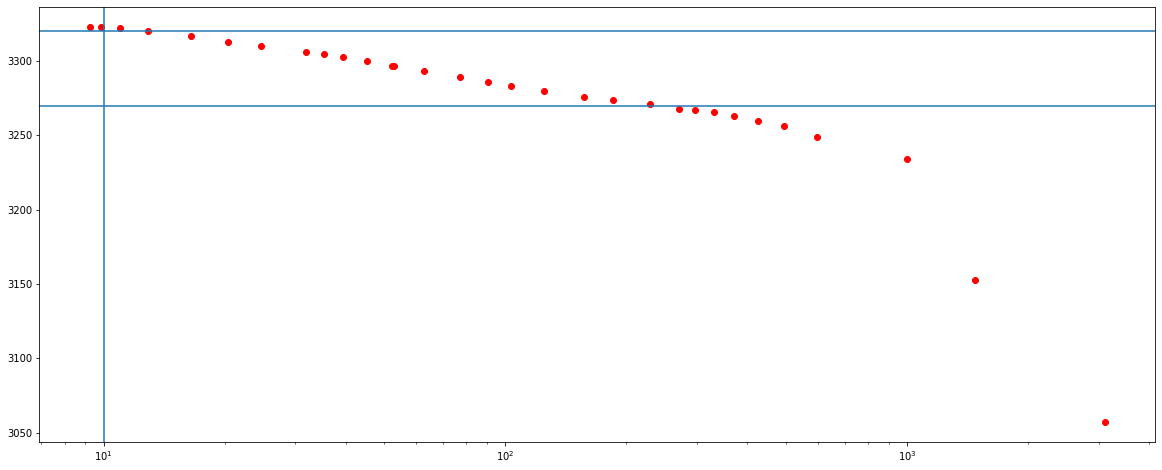

In [ ]:
plt.figure(figsize=(20,8))
plt.semilogx(df["(tp+Δt)/Δt"],df['Pws'],"ro")
plt.axhline(3320)
plt.axhline(3270)
plt.axvline(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(15)

,(tp+Δt)/Δt,Pws
0,3101.000000,3057
1,1477.190476,3153
2,1001.000000,3234
3,597.153846,3249
4,493.063492,3256
5,425.657534,3260
6,370.047619,3263
7,330.787234,3266
8,296.238095,3267
9,270.565217,3268


In [ ]:
st_df=df[df["Pws"]<3305]
st_df=df[df["Pws"]>3283]
st_df.head()

,(tp+Δt)/Δt,Pws
15,90.595376,3286
16,76.980392,3289
17,62.630219,3293
18,52.926298,3297
19,52.070840,3297


In [ ]:
x=st_df["(tp+Δt)/Δt"].values
y=st_df["Pws"].values

In [ ]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
m=reg.coef_

In [ ]:
pe=reg.intercept_

In [ ]:
x_1hr=(1+tp)

In [ ]:
P_1hr=reg.predict([[x_1hr]])
P_1hr

array([[3174.35177643]])

In [ ]:
X=st_df["(tp+Δt)/Δt"].values

In [ ]:
pe.dtype

dtype('float64')

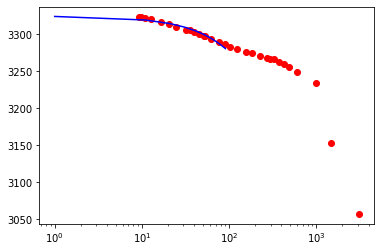

In [ ]:
plt.semilogx(df["(tp+Δt)/Δt"],df['Pws'],"ro")
X=np.array(np.arange(1,100,10))
Y=float(pe)+float(m)*X
plt.plot(X,Y,"b-")